<a href="https://colab.research.google.com/github/usugunawan15/Tubes-DTI/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/usugunawan15/Tubes-DTI/main/dataset_donor_darah.csv', sep = ';')
print('Shape of dataframe:', df.shape)
df

Shape of dataframe: (25824, 6)


,ID,Nama,Umur,Gol (Rh),JK,Frekuensi
0,6171DGRUD000091,Rudi Wardani,48,A+,Pria,4
1,6171DGMUH000223,Muhammad Isya Maulana,41,O+,Pria,3
2,6171M1RUS000015,Rustandi,35,O+,Pria,10
3,6171DGSAR000059,Sarzuni,44,B+,Pria,3
4,6171DGSYI000009,Syihab Ahmad,30,AB+,Pria,20
...,...,...,...,...,...,...
25819,6171DGARM000012,Armen,43,A+,Pria,2
25820,6171DGAPR000026,Apriyadi Riyanto,38,B+,Pria,5
25821,6171M2EMI000010,EMI SAFITRI,36,O+,Wanita,2
25822,6171M3RID000005,RIDWAN,36,A+,Pria,1


In [5]:
df['Gol (Rh)'].value_counts()

O+     10122
B+      7423
A+      6319
AB+     1934
X+         9
A-         7
O-         7
AB-        2
B-         1
Name: Gol (Rh), dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25824 entries, 0 to 25823
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nama       25817 non-null  object
 1   Umur       25824 non-null  int64 
 2   Gol (Rh)   25824 non-null  object
 3   JK         25824 non-null  int64 
 4   Frekuensi  25824 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1008.9+ KB


In [6]:
df.isnull().sum()

ID           0
Nama         7
Umur         0
Gol (Rh)     0
JK           0
Frekuensi    0
dtype: int64

In [11]:
df.drop(['ID'], axis=1, inplace=True)

In [12]:
df

,Nama,Umur,Gol (Rh),JK,Frekuensi
0,Rudi Wardani,48,A+,1,4
1,Muhammad Isya Maulana,41,O+,1,3
2,Rustandi,35,O+,1,10
3,Sarzuni,44,B+,1,3
4,Syihab Ahmad,30,AB+,1,20
...,...,...,...,...,...
25819,Armen,43,A+,1,2
25820,Apriyadi Riyanto,38,B+,1,5
25821,EMI SAFITRI,36,O+,0,2
25822,RIDWAN,36,A+,1,1


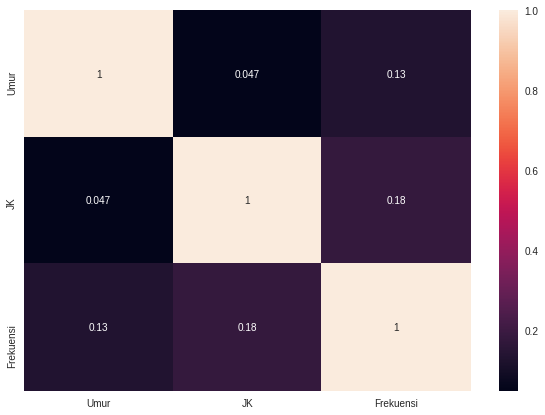

In [28]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [17]:
df.corr()

,Umur,JK,Frekuensi
Umur,1.000000,0.046899,0.131498
JK,0.046899,1.000000,0.179116
Frekuensi,0.131498,0.179116,1.000000


In [24]:
x = df.drop(["JK"], axis = 1)
x

,Nama,Umur,Gol (Rh),Frekuensi
0,Rudi Wardani,48,A+,4
1,Muhammad Isya Maulana,41,O+,3
2,Rustandi,35,O+,10
3,Sarzuni,44,B+,3
4,Syihab Ahmad,30,AB+,20
...,...,...,...,...
25819,Armen,43,A+,2
25820,Apriyadi Riyanto,38,B+,5
25821,EMI SAFITRI,36,O+,2
25822,RIDWAN,36,A+,1


In [27]:
y = df["JK"]
y

0        1
1        1
2        1
3        1
4        1
        ..
25819    1
25820    1
25821    0
25822    1
25823    1
Name: JK, Length: 25824, dtype: int64

**Training**

In [30]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18076, 4)
(7748, 4)
(18076,)
(7748,)
